In [1]:
from lut3d import *
import numpy as np
import cv2
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
lut = Lut3D()
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
img = cv2.imread('./0003.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))

In [7]:
def lut_loss(lut):
    less = (lut[(lut < 0)]) ** 2
    upper = (lut[(lut > 1)] - 1) ** 2
    return less.sum() + upper.sum()
creition = torch.nn.L1Loss()

In [10]:
for i in range(1000):
    new_img = lut(img)
    loss = lut_loss(lut.LUT) + creition(new_img, img)
    if i % 99 == 0:
        print(i, loss.detach().cpu())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor(9.4197e-05)
99 tensor(4.9341e-05)
198 tensor(5.1199e-05)
297 tensor(5.6636e-05)
396 tensor(4.8678e-05)
495 tensor(4.9026e-05)
594 tensor(5.5234e-05)
693 tensor(4.7622e-05)
792 tensor(5.1110e-05)
891 tensor(5.2049e-05)
990 tensor(5.6992e-05)


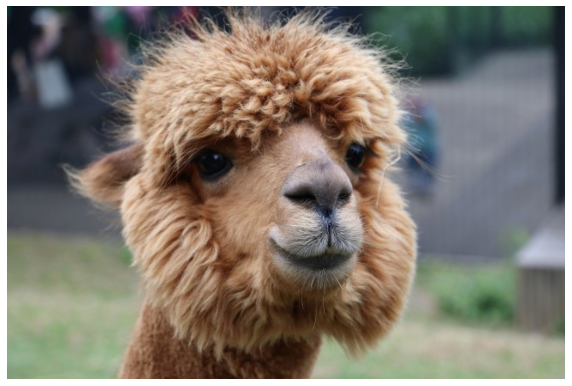

In [11]:
imgS = new_img.cpu().detach()
imgS = torch.squeeze(imgS)
imgS = torch.permute(imgS, (1,2,0)).numpy()
imgS *= 255
imgS = imgS.astype(np.uint8)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(imgS)